# Loading Path Planning Track Visualization

In [1]:
import numpy as np
import pandas as pd
from ast import literal_eval

in_file = '../data/36.34_logger.csv'
sample = pd.read_csv(in_file, sep=',')

sample.head()

,t,x,y,vd,xyd,nd,d
0,0,909.480,1128.67,0.000000,0.000000,6.0,6.16497
1,1,909.539,1128.77,0.088400,0.442000,6.0,6.06636
2,2,909.628,1128.77,0.088466,0.088463,6.0,6.06812
3,3,909.716,1128.77,0.088604,0.088602,6.0,6.07165
4,3,909.805,1128.77,0.088817,0.088814,6.0,6.07165


In [2]:
sample['xydsum'] = sample['xyd'] + sample['nd']
sample.describe()

,t,x,y,vd,xyd,nd,d,xydsum
count,147681.000000,147681.000000,147681.000000,147681.000000,147681.000000,147681.000000,147681.000000,147681.000000
mean,31940.928610,1319.047858,2085.163410,0.401000,0.401002,7.288818,7.225879,7.689820
std,18431.276042,778.221875,717.762466,0.056351,0.056345,2.873268,2.983813,2.847280
min,0.000000,151.751000,1124.900000,0.000000,0.000000,2.000000,-17.866100,2.288925
25%,16000.000000,525.037000,1286.850000,0.333163,0.333164,6.000000,5.822030,6.441997
50%,31932.000000,1382.510000,2108.730000,0.441988,0.441988,9.700000,8.632640,10.005416
75%,47865.000000,2117.840000,2890.050000,0.442000,0.442000,9.700000,9.717750,10.048845
max,63948.000000,2343.370000,3009.640000,0.442000,0.442000,9.700000,18.310600,10.142000


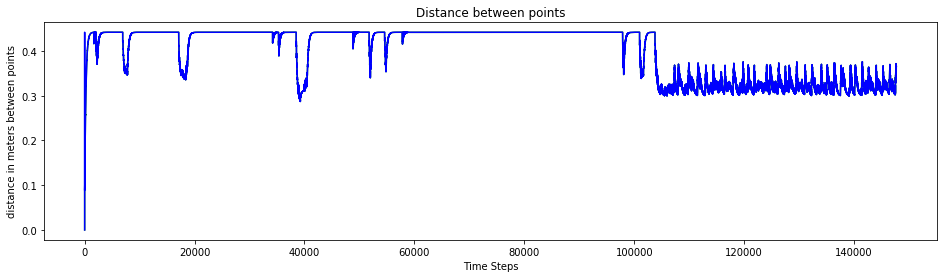

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
%matplotlib inline
sdistance = pd.Series(sample.vd)
xydistance = pd.Series(sample.xyd)
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 4))
p0 = ax1.plot(sdistance.index, sdistance, 'g', label='delta s')
p1 = ax1.plot(xydistance.index, xydistance, 'b', label='delta xy')
ax1.set_xlabel("Time Steps", fontsize=10)
ax1.set_ylabel("distance in meters between points", fontsize=10)
plt.title('Distance between points')
plt.show()

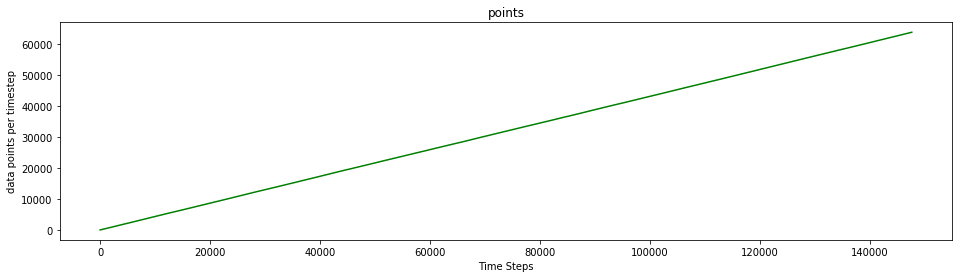

In [4]:
t = pd.Series(sample.t)
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 4))
p0 = ax1.plot(t.index, t, 'g', label='delta s')
#p1 = ax1.plot(xydistance.index, xydistance, 'b', label='delta xy')
ax1.set_xlabel("Time Steps", fontsize=10)
ax1.set_ylabel("data points per timestep", fontsize=10)
plt.title('points')
plt.show()

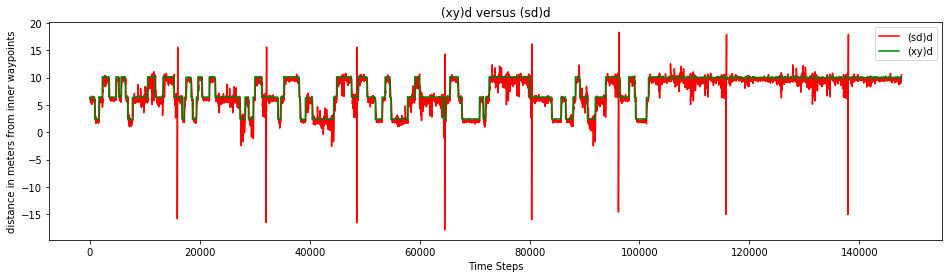

In [5]:
xyd = pd.Series(sample.xydsum)
sdd = pd.Series(sample.d)
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 4))
p0 = ax1.plot(sdd.index, sdd, 'r', label='(sd)d')
p1 = ax1.plot(xyd.index, xyd, 'g', label='(xy)d')
ax1.set_xlabel("Time Steps", fontsize=10)
ax1.set_ylabel("distance in meters from inner waypoints", fontsize=10)
plt.legend((p0[0],p1[0]), ('(sd)d', '(xy)d'))
plt.title('(xy)d versus (sd)d')
plt.show()

In [6]:
waypoint_file = "../data/highway_map.csv"
logger_file = "../data/outerlane_logger.csv"

with open(waypoint_file) as f:
    x_waypoint = []
    y_waypoint = []
    count = 0
    for line in f:
        if count > 0:
            data = line.split(' ')
            x_waypoint.append(data[0])
            y_waypoint.append(data[1])
        count += 1

with open(logger_file) as f:
    x_path = []
    y_path = []
    count = 0
    for line in f:
        if count > 0:
            data = line.split(',')
            x_path.append(data[1])
            y_path.append(data[2])
        count += 1

x_start = [ x_path[0] ]
y_start = [ y_path[0] ]

x_current = [ x_path[len(x_path)-1] ]
y_current = [ y_path[len(y_path)-1] ]

ool_x = [ 328.124, 2209.2, 316.408, 313.927, 402.907, 392.723, 317.528, 317.035, 317.035, 322.769 ]
ool_y = [ 2781.07, 2990.53, 2766.79, 2763.46, 2844.59, 2838.23, 2768.22, 2768.57, 2767.57, 2774.55 ]

maxax = [ 965.836, 162.728 ]
maxay = [ 2926.21, 2347.89 ]


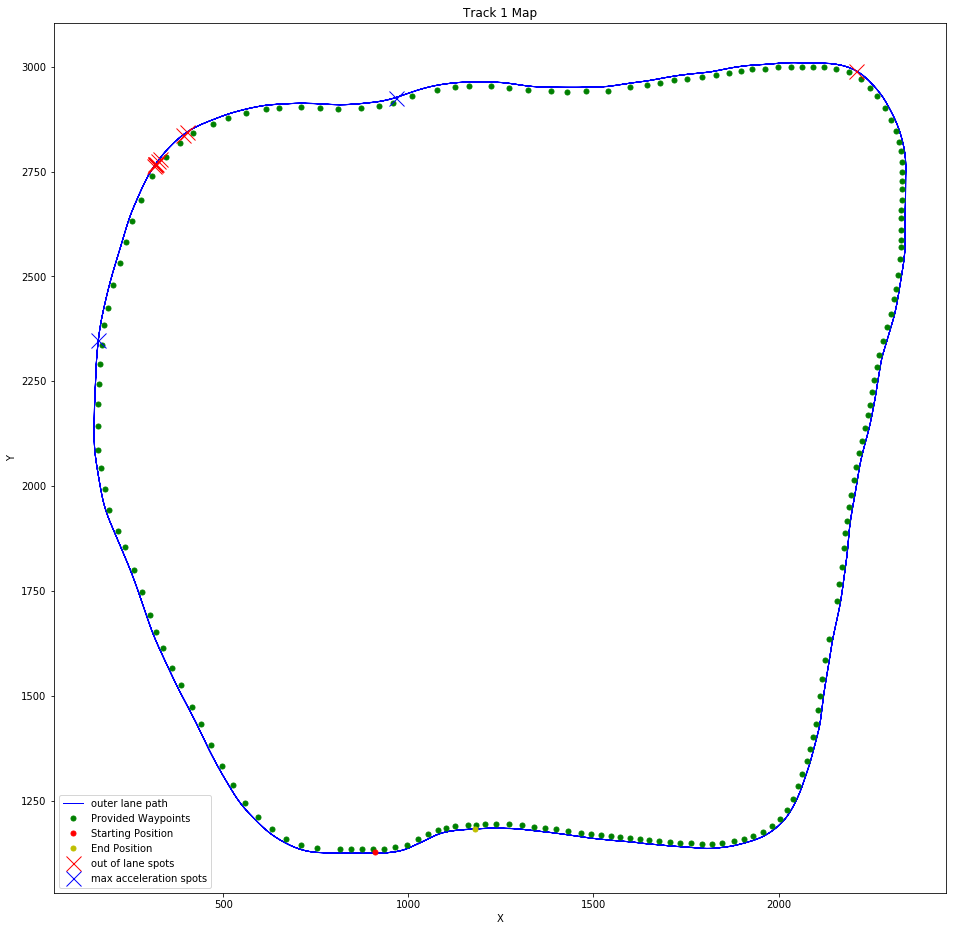

In [7]:
plt.rcParams["figure.figsize"] = [16, 16]
p1 = plt.plot(x_path, y_path, 'b', lw=1.0)
p2 = plt.plot(x_waypoint, y_waypoint, 'go', ms=5.0)
p3 = plt.plot(x_start, y_start, 'ro', ms=5.0)
p4 = plt.plot(x_current, y_current, 'yo', ms=5.0)
p5 = plt.plot(ool_x, ool_y, 'rx', ms=15.0)
p6 = plt.plot(maxax, maxay, 'bx', ms=15.0)
plt.title('Track 1 Map')
plt.xlabel("X", fontsize=10)
plt.ylabel("Y", fontsize=10)
plt.legend((p1[0],p2[0], p3[0], p4[0], p5[0], p6[0]), ('outer lane path','Provided Waypoints', 'Starting Position','End Position', 'out of lane spots', 'max acceleration spots'))
plt.show()